# Continuous Control

---

In this notebook, I will train a DDPG model using Unity ML environment.

### 1. Start the Environment

Run the next code cell to install a few packages(if you haven't already). This line will take a few minutes to run!

In [ ]:
#!pip -q install ./python

Please select one of the two options below for loading the environment.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

# select this if you are running the reacher app on your local machine(windows)
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In this environment, a double-jointed arm can move to target locations. A reward of +0.1 is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of 33 variables corresponding to position, rotation, velocity, and angular velocities of the arm. Each action is a vector with four numbers, corresponding to torque applicable to two joints. Every entry in the action vector should be a number between -1 and 1.

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Train the Agent

**Important Note**:
When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [4]:
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=42)

Episode 1	Score: 0.84	Average Score: 0.84
Episode 2	Score: 0.49	Average Score: 0.67
Episode 3	Score: 0.74	Average Score: 0.69
Episode 4	Score: 0.61	Average Score: 0.67
Episode 5	Score: 0.81	Average Score: 0.70
Episode 6	Score: 1.13	Average Score: 0.77
Episode 7	Score: 1.16	Average Score: 0.83
Episode 8	Score: 1.61	Average Score: 0.92
Episode 9	Score: 1.48	Average Score: 0.99
Episode 10	Score: 1.60	Average Score: 1.05
Episode 11	Score: 1.44	Average Score: 1.08
Episode 12	Score: 1.49	Average Score: 1.12
Episode 13	Score: 1.63	Average Score: 1.16
Episode 14	Score: 2.21	Average Score: 1.23
Episode 15	Score: 2.11	Average Score: 1.29
Episode 16	Score: 2.16	Average Score: 1.34
Episode 17	Score: 2.71	Average Score: 1.43
Episode 18	Score: 2.99	Average Score: 1.51
Episode 19	Score: 4.81	Average Score: 1.69
Episode 20	Score: 4.50	Average Score: 1.83
Episode 21	Score: 6.82	Average Score: 2.06
Episode 22	Score: 7.19	Average Score: 2.30
Episode 23	Score: 9.29	Average Score: 2.60
Episode 24	Score: 9.

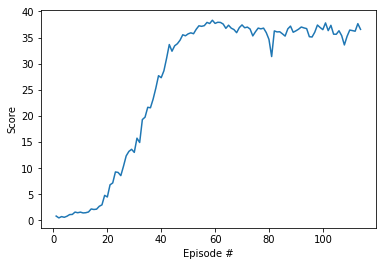

In [6]:
def ddpg(n_episodes=1000):
    scores_deque = deque(maxlen=100)
    scores_list = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        agent.reset()
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)

        while True:
            actions = agent.act(states)                        # select an action (for each agent)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states, actions, rewards, next_states, dones)
            scores += rewards                                  # update the score (for each agent)
            states = next_states
            if np.any(dones):
                break 
        scores_deque.append(np.mean(scores)) # np.mean(scores) because multiple agents hence avg. over all agents
        scores_list.append(np.mean(scores))
        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores), np.mean(scores_deque)))
        
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores_list

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch the agent play!

In [5]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth', map_location={'cuda:0': 'cpu'}))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth', map_location={'cuda:0': 'cpu'}))

env_info = env.reset(train_mode=False)[brain_name]        
states = env_info.vector_observations                  
scores = np.zeros(num_agents)                          

for i in range(200):
    actions = agent.act(states, add_noise=False)                    
    env_info = env.step(actions)[brain_name]        
    next_states = env_info.vector_observations        
    rewards = env_info.rewards                        
    dones = env_info.local_done                 
    scores += rewards                         
    states = next_states                              
    if np.any(dones):                              
        break

In [6]:
env.close()